# Algorithme des k plus proches voisins 
# Evaluation et sélection de modéle

## 1. Préambule

In [4]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

### Chargement et examen des données

In [2]:
# Charger les données
Pima_DF = pd.read_csv('pima_data.csv')

In [3]:
# Renommer les colonnes et regarder les données manquantes (il n'y en a pas)
Pima_DF.columns = ['#G', 'Gly', 'PSD', 'MG','Ins','IMC','Risk', 'Age', 'Label']
Pima_DF.head()

,#G,Gly,PSD,MG,Ins,IMC,Risk,Age,Label
0,1,85,66,29,0,26.6,0.351,31,-1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,-1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,-1


In [4]:
Pima_DF.shape

(767, 9)

In [5]:
df = Pima_DF.copy()

In [6]:
y = df['Label'].values

y = y.reshape(y.shape[0], 1)
y.shape

(767, 1)

In [7]:
X = df[df.columns[:-1]].values
X.shape

(767, 8)

#### Normalisation des données

In [8]:
N = (X - X.mean(axis=0)) / X.std(axis=0)

In [9]:
N.mean(axis=0)

array([-4.63196047e-18,  7.87433280e-17, -2.66337727e-16, -2.43177925e-17,
       -7.64273477e-17,  5.72047118e-16, -2.31598023e-17,  1.59802636e-16])

In [10]:
N.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

### Calcul de mesures d’erreur

In [11]:
from sklearn.model_selection import train_test_split

## P1. Séparez le jeu de données global (X, Y)

In [12]:
X_1, X_2, y_1, y_2 =  train_test_split(X, y, test_size=0.5)

## P2. Normalisez les deux jeux de données

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
stdScalerX = StandardScaler().fit(X_1)
X_1_std = stdScalerX.transform(X_1)
X_2_std = stdScalerX.transform(X_2)

## P3. Appliquez l’algorithme des k plus proches voisins

In [15]:
from sklearn.neighbors import KNeighborsClassifier

### k = 5

In [16]:
model = KNeighborsClassifier(n_neighbors=5)

In [17]:
model.fit(X_1_std, y_1)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [18]:
model.score(X_2_std, y_2)

0.7135416666666666

In [19]:
YpredTrain = model.predict(X_1_std)
YpredTest = model.predict(X_2_std)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_2, YpredTest))

              precision    recall  f1-score   support

          -1       0.75      0.82      0.79       245
           1       0.62      0.53      0.57       139

    accuracy                           0.71       384
   macro avg       0.69      0.67      0.68       384
weighted avg       0.71      0.71      0.71       384



In [22]:
print(classification_report(y_1, YpredTrain))

              precision    recall  f1-score   support

          -1       0.83      0.91      0.87       255
           1       0.79      0.63      0.70       128

    accuracy                           0.82       383
   macro avg       0.81      0.77      0.79       383
weighted avg       0.82      0.82      0.81       383



In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_2, YpredTest)

array([[201,  44],
       [ 66,  73]], dtype=int64)

In [25]:
confusion_matrix(y_1, YpredTrain)

array([[233,  22],
       [ 47,  81]], dtype=int64)

In [26]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'Sensibilite')

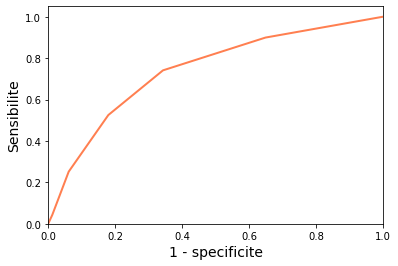

In [27]:
y_pred_proba = model.predict_proba(X_2_std)[:, 1]
[fpr, tpr, thr] = roc_curve(y_2, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### k = 15

In [28]:
model = KNeighborsClassifier(n_neighbors=15)

In [29]:
model.fit(X_1_std, y_1)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [30]:
model.score(X_2_std, y_2)

0.7421875

In [31]:
YpredTrain = model.predict(X_1_std)
YpredTest = model.predict(X_2_std)

In [32]:
print(classification_report(y_2, YpredTest))

              precision    recall  f1-score   support

          -1       0.75      0.89      0.81       245
           1       0.71      0.49      0.58       139

    accuracy                           0.74       384
   macro avg       0.73      0.69      0.70       384
weighted avg       0.74      0.74      0.73       384



In [33]:
print(classification_report(y_1, YpredTrain))

              precision    recall  f1-score   support

          -1       0.79      0.93      0.85       255
           1       0.77      0.51      0.61       128

    accuracy                           0.79       383
   macro avg       0.78      0.72      0.73       383
weighted avg       0.78      0.79      0.77       383



In [34]:
confusion_matrix(y_2, YpredTest)

array([[217,  28],
       [ 71,  68]], dtype=int64)

In [35]:
confusion_matrix(y_1, YpredTrain)

array([[236,  19],
       [ 63,  65]], dtype=int64)

Text(0, 0.5, 'Sensibilite')

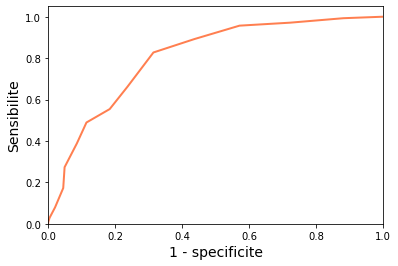

In [36]:
y_pred_proba = model.predict_proba(X_2_std)[:, 1]
[fpr, tpr, thr] = roc_curve(y_2, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

## 2. Mise en place d'une procédure d'apprentissage

In [37]:
y = df['Label'].values
y = y.reshape(y.shape[0], 1)
y.shape

(767, 1)

In [38]:
X = df[df.columns[:-1]].values
X.shape

(767, 8)

In [39]:
X_av, X_t, y_av, y_t = train_test_split(X, y, test_size=0.5)

### Stratégie 1 : ensemble d’apprentissage, de validation et de test

In [40]:
p_k = [1, 5, 10, 15, 20, 25]

#### S1.1. Séparez l’ensemble (X_av, Y_av)

In [41]:
X_a, X_v, y_a, y_v = train_test_split(X_av, y_av, test_size=0.4) 

#### S1.2. Normalisez les jeux de données

In [42]:
# (X_t, y_t) doit être l'ensemble de référence puisque c'est l'ensemble le plus peuplé

In [43]:
stdScalerX = StandardScaler().fit(X_t)
X_t_std = stdScalerX.transform(X_t)
X_v_std = stdScalerX.transform(X_v)
X_a_std = stdScalerX.transform(X_a)

#### S1.3. Appliquez l’algorithme des k plus proches voisins

In [44]:
score_sur_validation = np.array([])
score_sur_apprentissage = np.array([])
v = 0
a = 0
for k in p_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_a, y_a)
    v = model.score(X_v, y_v)
    a = model.score(X_a, y_a)
    score_sur_validation = np.append(score_sur_validation, v)
    score_sur_apprentissage = np.append(score_sur_apprentissage, a)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

#### S1.4. Tracez sur un même graphique l’erreur

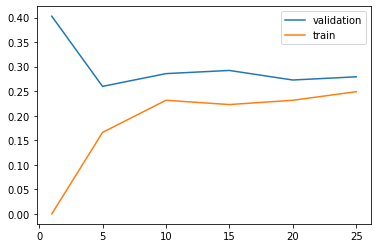

In [45]:
plt.plot(p_k, 1 - score_sur_validation, label="validation")
plt.plot(p_k, 1 - score_sur_apprentissage, label="train")
plt.legend()

#### S1.5. Sélectionner le meilleur modèle et évaluez l’erreur de test

In [46]:
k = 25
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_a, y_a)
model.score(X_t, y_t)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.703125

### Stratégie 2 : validation-croisée pour la sélection de k

In [47]:
y = df['Label'].values
y = y.reshape(y.shape[0], 1)
y.shape

(767, 1)

In [48]:
X = df[df.columns[:-1]].values
X.shape

(767, 8)

In [49]:
X_av, X_t, y_av, y_t = train_test_split(X, y, test_size=0.5)

#### S2.1. Normalisez les jeux de données (X_av, Y_av)

In [50]:
stdScalerX = StandardScaler().fit(X_av)
X_av_std = stdScalerX.transform(X_av)
X_t_std = stdScalerX.transform(X_t)

y_t.shape

(384, 1)

#### S2.2.

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
model = KNeighborsClassifier()
cross_val_score(model, X_av, y_av, cv=5, scoring='accuracy')

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.72727273, 0.7012987 , 0.71428571, 0.71052632, 0.72368421])

#### S2.3.

In [53]:
val_score = np.array([])

In [54]:
for k in p_k:
    score = cross_val_score(KNeighborsClassifier(k), X_av_std, y_av, cv=5).mean()
    val_score = np.append(val_score, score)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

#### S2.4.

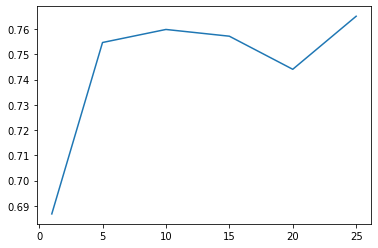

In [55]:
plt.plot(p_k, val_score)

#### S2.5.

In [56]:
model = KNeighborsClassifier()

In [57]:
from sklearn.model_selection import validation_curve

In [58]:
train_score, val_score = validation_curve(model, X_av_std, y_av, 'n_neighbors', p_k, cv=5)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[1, 5, 10, 15, 20, 25] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passe

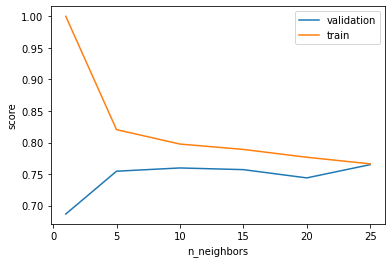

In [59]:
plt.plot(p_k, val_score.mean(axis=1), label='validation')
plt.plot(p_k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')

plt.legend()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {'n_neighbors': p_k,
             'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_av_std, y_av)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]})

In [62]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 5}
0.7703349282296651


In [63]:
model = grid.best_estimator_

In [64]:
model.score(X_t_std, y_t)

0.7291666666666666

In [65]:
confusion_matrix(y_t, model.predict(X_t_std))

array([[206,  44],
       [ 60,  74]], dtype=int64)

In [66]:
from sklearn.model_selection import learning_curve

In [67]:
N, train_score, val_score = learning_curve(model, X_av_std, y_av, train_sizes=np.linspace(0.1, 1, 10), cv=5)

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bdame\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[ 30  61  91 122 153 183 214 244 275 306]


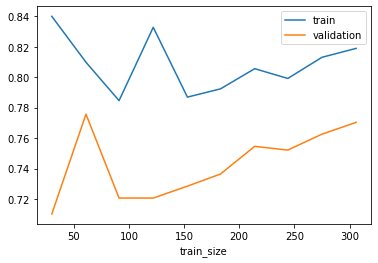

In [68]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.legend()

## 3. Exercice noté